### Bike Sharing Case-study 

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### Data dictionary:
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

#### Steps Followed:
1. Reading, Understanding, and visualizing the data
2. Preparing the data for model (train-test split)
3. Trainining the Model
4. Residual Analysis
5. Prediction & evaluation on the test

#### Step 1: Reading, Understanding, and visualizing the data

#### Importing libraries:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings('ignore')

#### Loading Dataset

In [2]:
bike_df = pd.read_csv("day.csv")

In [3]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_df.shape

(730, 16)

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#missing value counts
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Null values are not found

In [8]:
# Checking for Duplicates 
bike_df.duplicated().sum()

0

Duplicates are not found

#### Encoding Categorical variables

In [9]:
#Converting Season into Categorical variable as it is not continous variable
#Encoded into appropriate Category
#Converted into category data type
bike_df['season'] = bike_df[['season']].apply(lambda x : x.map({1:'Spring', 2:'Summer', 
                                                                3:'Fall', 4:'Winter'})).astype('category')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
bike_df.season.value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [11]:
bike_df.yr.value_counts()

yr
0    365
1    365
Name: count, dtype: int64

Year is also Categorical variable but it is already encoded in to 1 or 0 <br>
Here<br>
0 - 2018<br>
1 - 2019 

In [12]:
#Converting Month into Categorical variable as it is not continous variable
#Encoded into appropriate Category
#Converted into category data type
bike_df['mnth'] = bike_df[['mnth']].apply(lambda x : x.map({1:'Jan', 2:'Feb', 3:'Mar',
                                                            4:'Apr',5:'May', 6:'Jun', 
                                                            7:'Jul', 8:'Aug',9:'Sep', 
                                                            10:'Oct', 11:'Nov', 12:'Dec'})).astype('category')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
bike_df.mnth.value_counts()

mnth
Aug    62
Dec    62
Jan    62
Jul    62
Mar    62
May    62
Oct    62
Apr    60
Jun    60
Nov    60
Sep    60
Feb    56
Name: count, dtype: int64

In [14]:
bike_df.holiday.value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

holiday is also Categorical variable but it is already encoded in to 1 or 0 <br>
Here<br>
0 - Not a holiday<br>
1 - holiday 

In [15]:
#Converting weekday into Categorical variable as it is not continous variable
#Encoded into appropriate Category
#Converted into category data type
bike_df['weekday'] = bike_df[['weekday']].apply(lambda x : x.map({0:'Sunday',1:'Monday', 
                                                                  2:'Tuesday', 3:'Wednesday', 
                                                                  4:'Thursday',5:'Friday', 6:'Saturday'})).astype('category')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
bike_df.weekday.value_counts()

weekday
Monday       105
Saturday     105
Sunday       105
Friday       104
Thursday     104
Tuesday      104
Wednesday    103
Name: count, dtype: int64

In [17]:
bike_df.workingday.value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

workingday is also Categorical variable but it is already encoded in to 1 or 0 <br>
Here<br>
1 -working day <br>
0 - Not a working day

In [18]:
#Converting weathersit into Categorical variable as it is not continous variable
#Encoded into appropriate Category
#Converted into category data type
bike_df['weathersit'] = bike_df[['weathersit']].apply(lambda x : x.map({1:'Clear',
                                                                        2:'Mist', 3:'Light_Snow', 
                                                                        4:'Heavy_rain'})).astype('category')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
bike_df.weathersit.value_counts()

weathersit
Clear         463
Mist          246
Light_Snow     21
Name: count, dtype: int64

In [20]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   dteday      730 non-null    object  
 2   season      730 non-null    category
 3   yr          730 non-null    int64   
 4   mnth        730 non-null    category
 5   holiday     730 non-null    int64   
 6   weekday     730 non-null    category
 7   workingday  730 non-null    int64   
 8   weathersit  730 non-null    category
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  hum         730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(7), object(1)
memory usage: 72.5+ KB


In [21]:
##Dropping below columns## 
#instant: record index,  as this is just row index will not have any significance in prediting Target variable (cnt)
#dteday : date, Date is already extracted into month and year columns

bike_df = bike_df.drop(['instant','dteday'],axis=1)

In [22]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [23]:
# Dropping casual and registered variables as cnt is sum of casual and registered.
# Casual and registered are also dependent variables like cnt 
# As per problem statement we need to consider cnt as Target variable. So dropping below columns 
bike_df = bike_df.drop(['casual', 'registered'],axis=1)

In [24]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [25]:
num_var = ['temp','atemp','hum','windspeed','cnt']

#### Numerical features visualizing 

<Axes: xlabel='cnt', ylabel='Density'>

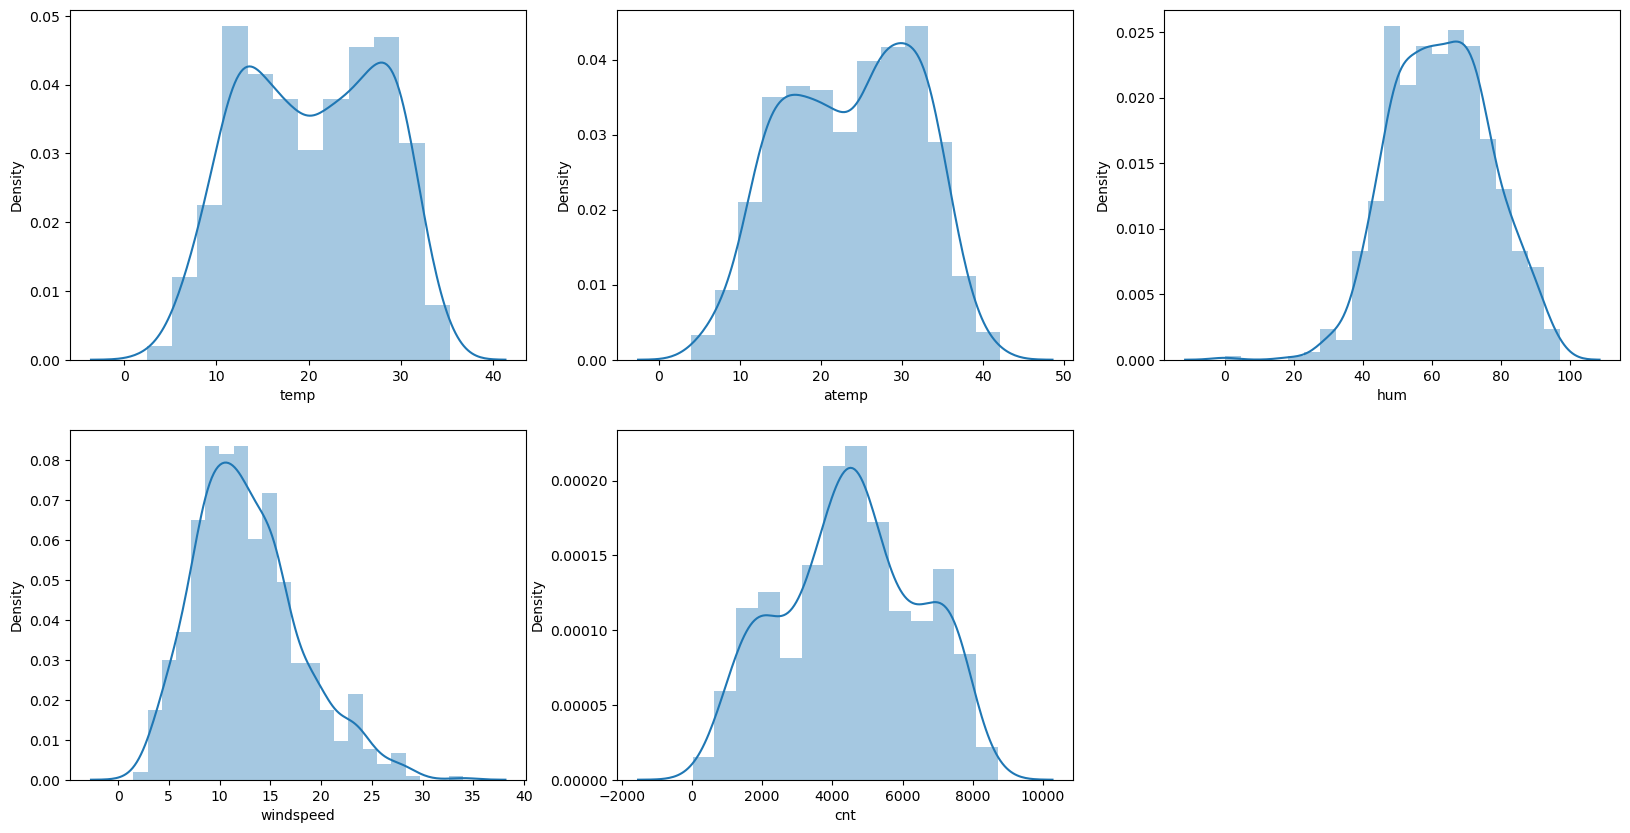

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.distplot(bike_df['temp'])

plt.subplot(2,3,2)
sns.distplot(bike_df['atemp'])

plt.subplot(2,3,3)
sns.distplot(bike_df['hum'])

plt.subplot(2,3,4)
sns.distplot(bike_df['windspeed'])

plt.subplot(2,3,5)
sns.distplot(bike_df['cnt'])

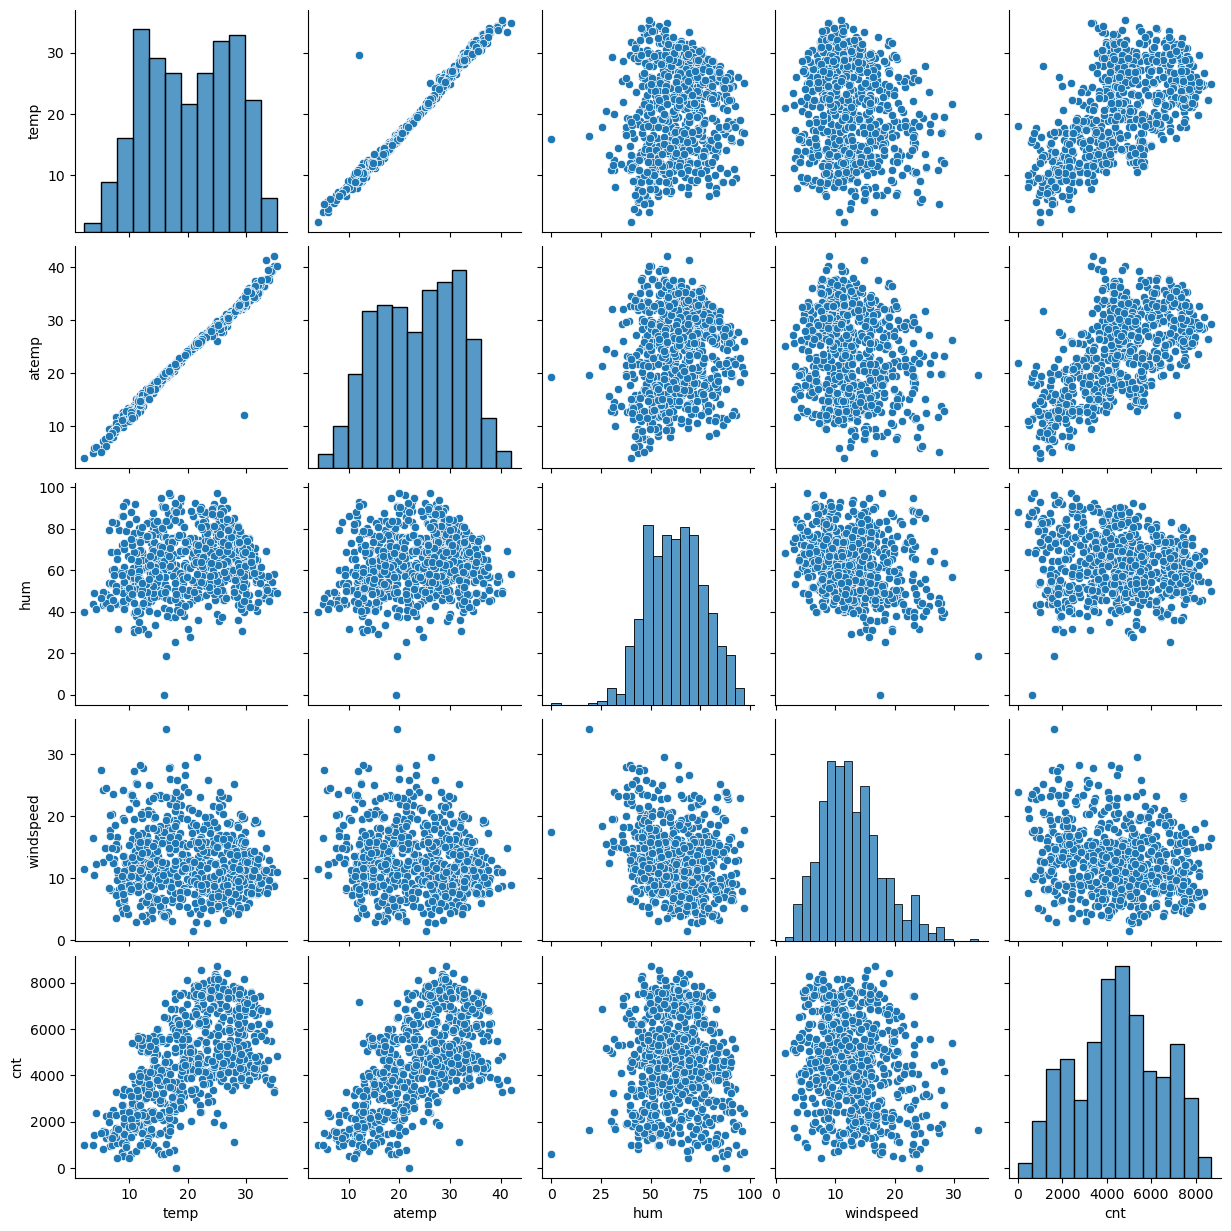

In [27]:
sns.pairplot(bike_df[num_var])

Observations:

Above pairplot shows that `temp` and `atemp` are linear relation with `cnt`. Other variables doesnt looks to be showing a clear linear trend

In [91]:
round(bike_df[num_var].corr(),4)

,temp,atemp,hum,windspeed,cnt
temp,1.0000,0.9917,0.1286,-0.1582,0.6270
atemp,0.9917,1.0000,0.1415,-0.1839,0.6307
hum,0.1286,0.1415,1.0000,-0.2485,-0.0985
windspeed,-0.1582,-0.1839,-0.2485,1.0000,-0.2351
cnt,0.6270,0.6307,-0.0985,-0.2351,1.0000


#### Categorical features visualizing  

In [28]:
cat_var = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

<Axes: xlabel='weathersit', ylabel='cnt'>

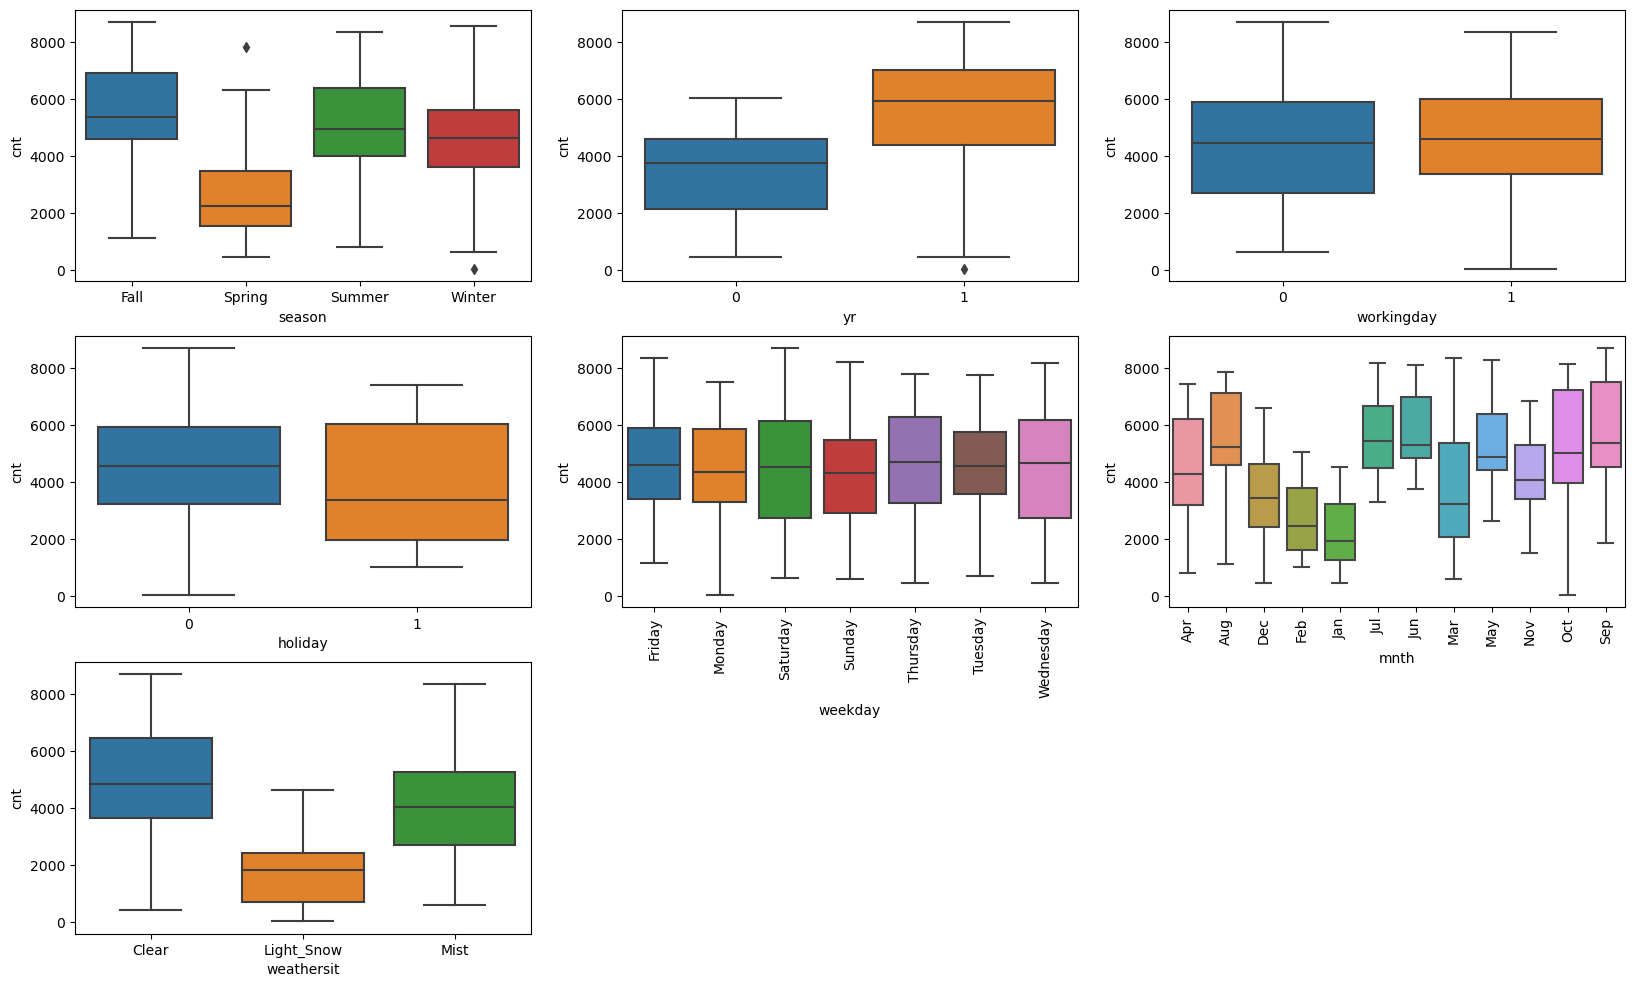

In [29]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike_df)

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bike_df)

plt.subplot(3,3,6)
sns.boxplot(x='mnth',y='cnt',data=bike_df)
plt.xticks(rotation=90)

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike_df)

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike_df)
plt.xticks(rotation=90)

plt.subplot(3,3,3)
sns.boxplot(x='workingday',y='cnt',data=bike_df)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bike_df)


Observations:
- The cnt for the year 2019 is more than the year 2018. So this indicates there is increase in demand from year 2018 to 2019.
- cnt for the months (May,Jun,Jul,Aug,Sep,Oct) is more compared to other months. `So mnth column can be possible predictor of cnt`
- Fall  has higher booking, and there is no much significant differnce between summer , winter. spring has lowest cnt. `So possible season can be one of the predictors.`
- The cnt are more on a workingday (holiday = 0). `So workingday might be a possible predictor.`
- As per the above plot there is very small / negligible difference on the cnt variable for all weekdays. `So, weekday, from the initial observation doesnt look to be a very good predictor of the bookings (cnt)`.
-When the weather is Clear (weathersit), the cnt is more as compared to other weather conditions.  `So this is indicating weather has significance in terms of  predicting the model.`

In [30]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Dummy Variables creation

- **`yr`**, **`holiday`** , **`workingday`**  - These columns have only values of 0 or 1. So its already a binary variable so no need to introduce a dummy variable.

- **`mnth`** - This has the data about the month number. So dummy variable will be introduced indicating each month (11 dummy variables in this case)

- **`season`** - There are 4 seasons as per the data dictionary, so dummy variables will be introduced. indicating the wheather (3 dummy variables in this case)

- **`weekday`**: This has the data about the day of the week. So dummy variable will be introduced indicating each weekday (6 dummy variables)

- **`weathersit:`**  There are 4 categories of wheathersit as per the data dictionary, so dummy variables will be introduced. indicating the wheather (3 dummy variables in this case)

In [31]:
status = pd.get_dummies(bike_df['season'],dtype=int,drop_first=True)
bike_df = pd.concat([bike_df,status],axis = 1)

In [32]:
status = pd.get_dummies(bike_df['mnth'],dtype=int,drop_first=True)
bike_df = pd.concat([bike_df,status],axis = 1)

In [33]:
status = pd.get_dummies(bike_df['weekday'],dtype=int,drop_first=True)
bike_df = pd.concat([bike_df,status],axis = 1)

In [34]:
status = pd.get_dummies(bike_df['weathersit'],dtype=int,drop_first=True)
bike_df = pd.concat([bike_df,status],axis = 1)

In [35]:
#dropping season , mnth , weekday, weathersit as already dummies are created for these variables
bike_df = bike_df.drop(['season', 'mnth','weekday', 'weathersit'],axis=1)

In [36]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


<Axes: >

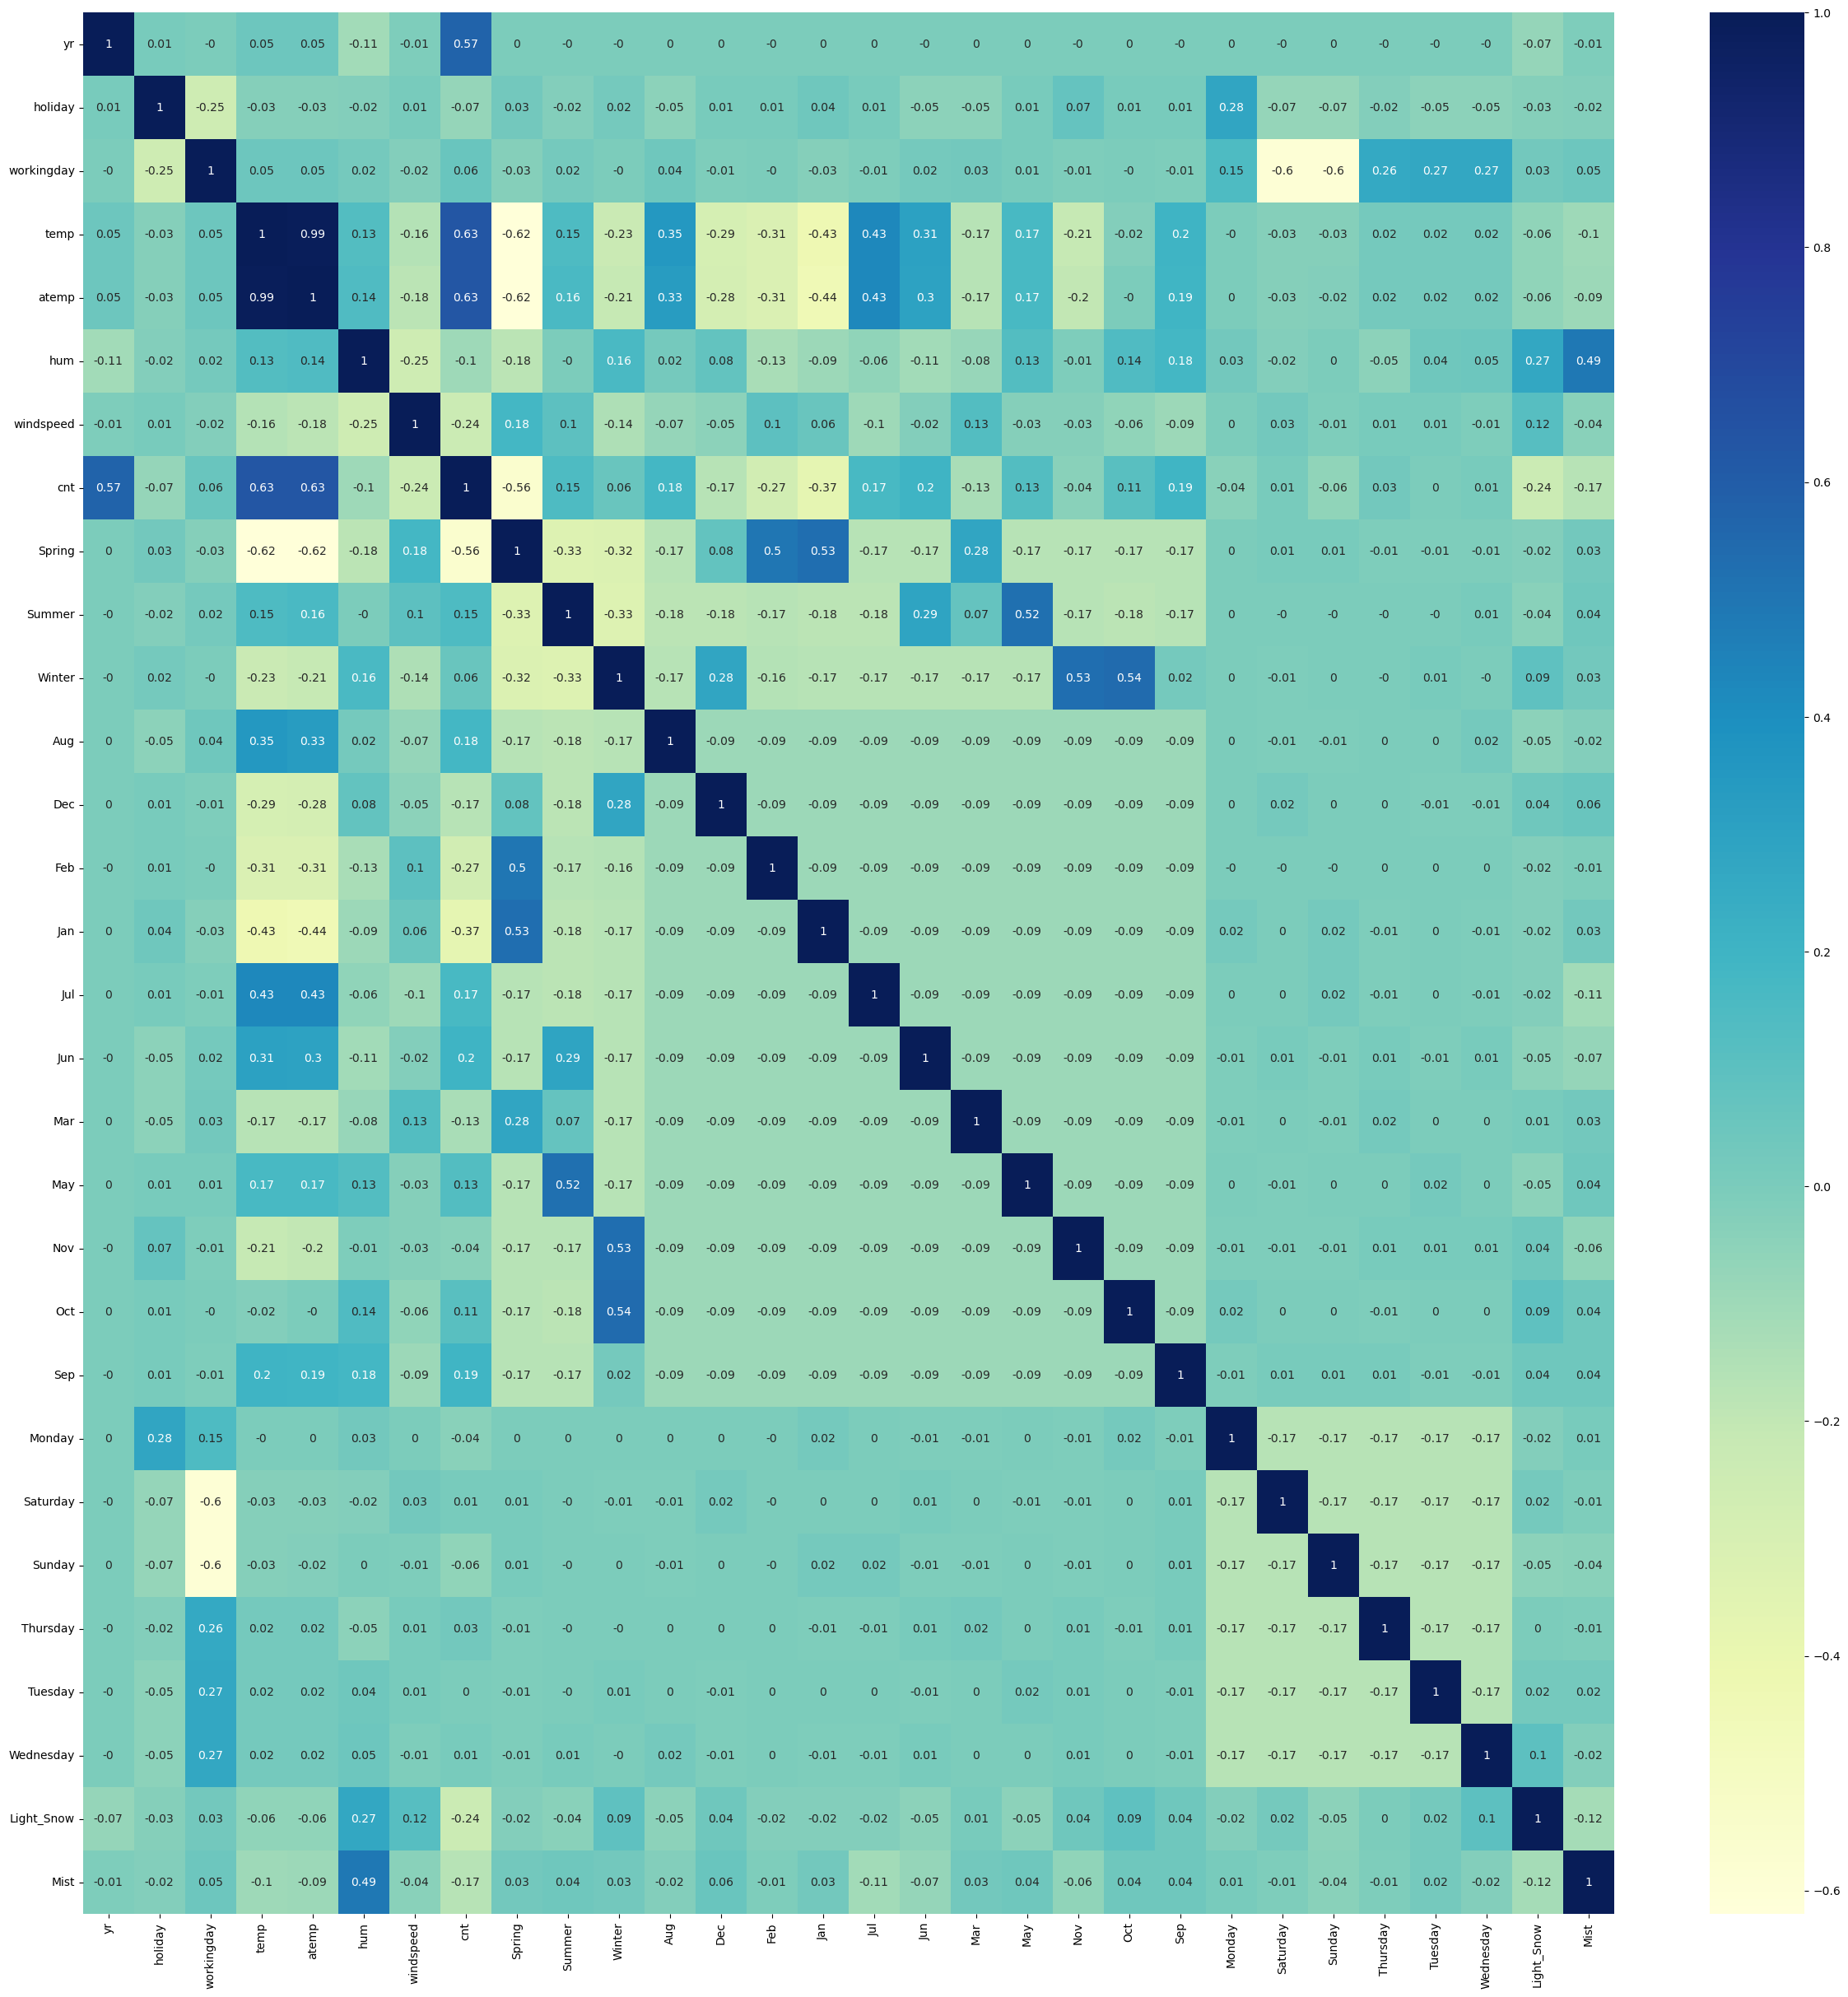

In [37]:
plt.figure(figsize=(30,30))
sns.heatmap(round(bike_df.corr(),2),annot=True,cmap="YlGnBu")

Above heatmap shows that `temp` and `atemp` are highly correlated  (~1) as these are highly depend on each other we can drop any one of the feature (But we will confirm after calculating VIF)

#### Step 2: Preparing the data for model (train-test split)

In [38]:
#Train-Test split   - 70% Train 30% Test is considered for buliding model
bike_df_train,bike_df_test = train_test_split(bike_df,train_size=0.7,random_state=100)

In [39]:
#Check the share of training data set
print(bike_df_train.shape)

(510, 30)


In [40]:
#Check the share of test data set
print(bike_df_test.shape)

(220, 30)


#### Scaling

Min-max scaling technique is used to scale the values of a feature to range between 0 and 1. It will replace every value in a column with a new value using below formula.

m = (x -xmin) / (xmax -xmin)

Scaling is done only on numerical features. Categorical features are already in 0 and 1 range.
This also address outliers as all values now will lie between 0 and 1. 


In [41]:
#Rescale using MIN-MAX
# Fit and tranform on training Data

scaler = MinMaxScaler()
bike_df_train[num_var] = scaler.fit_transform(bike_df_train[num_var])
bike_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [42]:
bike_df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Step 3: Trainining the Model

creating X train(Independent) and y train(Dependent) 

In [43]:
#y_train : contains target i.e., 'cnt' (Dependent variable)
y_train = bike_df_train.pop('cnt') 
#X_train: contains all other columns other than Target column ( independent variables)
X_train = bike_df_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

#### Model 1:
- Model using Ordinary Least Square method in statsmodel 

In [45]:
#Build a model with all the variables

# Adding constant as OLS model by default constant will not be considered

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.81e-180
Time:                        23:56:53   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2433      0.035      6.887      0.000       0.174       0.313
yr             0.2325      0.008     28.794      0.000       0.217       0.248
holiday        0.0109      0.024      0.451      0.652      -0.037       0.058
workingday     0.0963      0.012      7.835      0.000       0.072       0.120
temp           0.3880      0.142      2.727      0.007       0.108       0.668
atemp          0.0590      0.138      0.426      0.670      -0.213       0.331
hum           -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed     -0.1836      0.026     -6.962      0.000      -0.235      -0.132
Spring        -0.0454      0.030     -1.511      0.131      -0.104       0.014
Summer         0.0424      0.026      1.617      0.107      -0.009       0.094
Winter         0.1071      0.028      3.826      0.000       0.052       0.162
Aug            0.0223      0.034      0.657      0.511      -0.044       0.089
Dec           -0.0443      0.034     -1.316      0.189      -0.110       0.022
Feb           -0.0323      0.033     -0.980      0.327      -0.097       0.032
Jan           -0.0631      0.034     -1.876      0.061      -0.129       0.003
Jul           -0.0327      0.035     -0.931      0.352      -0.102       0.036
Jun            0.0060      0.025      0.241      0.810      -0.043       0.055
Mar            0.0016      0.025      0.063      0.950      -0.047       0.050
May            0.0255      0.021      1.208      0.228      -0.016       0.067
Nov           -0.0398      0.036     -1.093      0.275      -0.111       0.032
Oct            0.0077      0.036      0.215      0.830      -0.063       0.078
Sep            0.0868      0.032      2.711      0.007       0.024       0.150
Monday        -0.0216      0.015     -1.401      0.162      -0.052       0.009
Saturday       0.0952      0.014      6.910      0.000       0.068       0.122
Sunday         0.0410      0.014      2.929      0.004       0.013       0.068
Thursday      -0.0097      0.016     -0.623      0.534      -0.040       0.021
Tuesday       -0.0184      0.016     -1.184      0.237      -0.049       0.012
Wednesday     -0.0059      0.015     -0.394      0.694      -0.035       0.023
Light_Snow    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
Mist          -0.0595      0.010     -5.701      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                     7.50e+15
==============================================================================

N

`Observation :` 

There are many features for which p value is greater than  0.0005 
eg : Holiday , atemp , Summer , Winter,Spring , Aug , Dec , Feb etc., 

`Forward/backward/Stepwise Elimination Methods` takes many iterations so will be proceeding with `RFE (Recursive Feature Elimination Method)` in conjunction with `Manual feature selection menthod`.

`R2` - 0.853 <br>
`Adj R2` - 0.844

High number of feature and high R2 and Adj R2 tells that this model is overfitted may not work propely with unseen data.




In [46]:
# VIF Calculations for model 1
vif = pd.DataFrame()
X = X_train_sm.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
2,workingday,85.56
3,temp,66.90
4,atemp,56.03
22,Saturday,19.71
23,Sunday,18.34
7,Spring,10.77
9,Winter,9.46
8,Summer,8.29
18,Nov,6.79
10,Aug,6.47


#### Model 2 
- Will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [47]:
# Recursive feature elimination 
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 15
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [48]:
#Print the ranking of all the features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 12),
 ('Light_Snow', True, 1),
 ('Mist', True, 1)]

In [49]:
#list of selected columns from RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jan', 'Jul', 'Sep', 'Saturday', 'Light_Snow',
       'Mist'],
      dtype='object')

In [50]:
#list of unselected columns from RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [51]:
X_train_rfe = X_train[col]

In [52]:
# VIF calculation for model 2  after removing unselected columns by RFE
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,Spring,4.53
8,Winter,3.46
7,Summer,2.85
14,Mist,2.29
0,yr,2.09
12,Saturday,1.98


Observation: 

Still seeing many features are having high VIF<br> 
for eg : hum, temp , workingday

#### Model 3 
Using RFE we are going to eliminate another 5 columns i.e., selecting top 10 features

In [53]:
# Recursive feature elimination 
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)

# Running RFE with the output number of the variable equal to 10
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train_rfe, y_train)

In [54]:
#Print the ranking of all the features
list(zip(X_train_rfe.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', False, 2),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Jan', False, 6),
 ('Jul', True, 1),
 ('Sep', True, 1),
 ('Saturday', False, 4),
 ('Light_Snow', True, 1),
 ('Mist', False, 3)]

In [55]:
#list of selected columns from RFE
col = X_train_rfe.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Summer', 'Winter', 'Jul',
       'Sep', 'Light_Snow'],
      dtype='object')

In [56]:
#list of unselected columns from RFE 
X_train_rfe.columns[~rfe.support_]

Index(['workingday', 'Spring', 'Jan', 'Saturday', 'Mist'], dtype='object')

In [57]:
X_train_rfe = X_train_rfe[col]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,Summer,Winter,Jul,Sep,Light_Snow
576,1,0,0.815169,0.725633,0.264686,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,1,0,0,0,0


In [58]:
# VIF calculation for model 3  after removing unselected columns by RFE
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.29
2,temp,9.29
4,windspeed,3.54
0,yr,2.02
5,Summer,1.76
6,Winter,1.68
7,Jul,1.55
8,Sep,1.29
9,Light_Snow,1.09
1,holiday,1.04


Observation : 

Variance inflation factor(`VIF`) for `hum`  and `temp` still high this indicates that still `Multicollinearity` exists in model.<br>
So will try dropping a feature and check.

based on below hierarchy<br>

- High p-value, high VIF - Drop such variables straighaway
- High -Low:
    - High p-value, Low VIF: Remove these variables first
    - Low p-value, high VIF: Remove these variables after the ones above
- Low p-value, low VIF - Keep Such variables

#### Model 4:
- Model using Ordinary Least Square method in statsmodel to check P values of features 


In [59]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.79e-186
Time:                        23:56:54   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2682      0.026     10.292      0.000       0.217       0.319
yr             0.2259      0.008     27.118      0.000       0.210       0.242
holiday       -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temp           0.6200      0.023     27.492      0.000       0.576       0.664
hum           -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed     -0.2059      0.026     -7.889      0.000      -0.257      -0.155
Summer         0.0800      0.011      7.281      0.000       0.058       0.102
Winter         0.1390      0.011     12.903      0.000       0.118       0.160
Jul           -0.0482      0.018     -2.606      0.009      -0.085      -0.012
Sep            0.0944      0.016      5.724      0.000       0.062       0.127
Light_Snow    -0.1914      0.026     -7.470      0.000      -0.242      -0.141
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observation : 

Current model is bulit on 10 features still able to explain 82.9%( `Adj R2 - 82.9%`) of variance. 
Looks like this is good sign. 

#### Model 5
- Buliding model 5 after removing Jul feature as "Jul" is less significant (P value > 0.005)

In [60]:
X_train_rfe = X_train_rfe.drop("Jul",axis=1)

In [61]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.2
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          4.74e-186
Time:                        23:56:54   Log-Likelihood:                 490.74
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     500   BIC:                            -919.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2682      0.026     10.234      0.000       0.217       0.320
yr             0.2268      0.008     27.103      0.000       0.210       0.243
holiday       -0.0915      0.026     -3.467      0.001      -0.143      -0.040
temp           0.5928      0.020     29.471      0.000       0.553       0.632
hum           -0.2784      0.032     -8.776      0.000      -0.341      -0.216
windspeed     -0.2034      0.026     -7.755      0.000      -0.255      -0.152
Summer         0.0892      0.010      8.523      0.000       0.069       0.110
Winter         0.1434      0.011     13.413      0.000       0.122       0.164
Sep            0.1052      0.016      6.554      0.000       0.074       0.137
Light_Snow    -0.1948      0.026     -7.570      0.000      -0.245      -0.144
==============================================================================
Omnibus:                       60.303   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.427
Skew:                          -0.717   Prob(JB):                     1.73e-24
Kurtosis:                       4.759   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# VIF calculation for model 5  after removing unselected columns by RFE
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.02
2,temp,7.11
4,windspeed,3.54
0,yr,2.01
6,Winter,1.64
5,Summer,1.58
7,Sep,1.20
8,Light_Snow,1.09
1,holiday,1.04


Observation: 

Now there are no features which are less significant (p < 0.005).<br>
`Adj R2 - 82.7%` which still holds good.<br>
But `VIF` of `hum` is very high.

#### Model 6 
- Buliding model 6 by dropping `hum` feature as "hum" is having high VIF (`VIF of "hum" > 5`)

In [63]:
X_train_rfe = X_train_rfe.drop("hum",axis=1)

In [64]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          9.22e-172
Time:                        23:56:54   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0875      0.017      5.029      0.000       0.053       0.122
yr             0.2334      0.009     26.093      0.000       0.216       0.251
holiday       -0.0867      0.028     -3.060      0.002      -0.142      -0.031
temp           0.5682      0.021     26.580      0.000       0.526       0.610
windspeed     -0.1455      0.027     -5.340      0.000      -0.199      -0.092
Summer         0.0812      0.011      7.256      0.000       0.059       0.103
Winter         0.1261      0.011     11.179      0.000       0.104       0.148
Sep            0.0895      0.017      5.229      0.000       0.056       0.123
Light_Snow    -0.2535      0.027     -9.506      0.000      -0.306      -0.201
==============================================================================
Omnibus:                       62.269   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.317
Skew:                          -0.761   Prob(JB):                     8.20e-24
Kurtosis:                       4.640   Cond. No.                         9.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_model2 = sm.OLS(y_train,X_train_lm).fit()

#Check Summary
lm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          9.22e-172
Time:                        23:56:54   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0875      0.017      5.029      0.000       0.053       0.122
yr             0.2334      0.009     26.093      0.000       0.216       0.251
holiday       -0.0867      0.028     -3.060      0.002      -0.142      -0.031
temp           0.5682      0.021     26.580      0.000       0.526       0.610
windspeed     -0.1455      0.027     -5.340      0.000      -0.199      -0.092
Summer         0.0812      0.011      7.256      0.000       0.059       0.103
Winter         0.1261      0.011     11.179      0.000       0.104       0.148
Sep            0.0895      0.017      5.229      0.000       0.056       0.123
Light_Snow    -0.2535      0.027     -9.506      0.000      -0.306      -0.201
==============================================================================
Omnibus:                       62.269   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.317
Skew:                          -0.761   Prob(JB):                     8.20e-24
Kurtosis:                       4.640   Cond. No.                         9.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,Summer,1.55
5,Winter,1.34
6,Sep,1.20
7,Light_Snow,1.06
1,holiday,1.03


Observation: 

In current model VIF for remaining features are less than 5 which means that Multicollinearity is very less. <br>
all features p value < 0.005 which means that all features are significant. <br>

`Adj R2 - 80.1%` - there is slight dip in the Adj R2. So we will stop here. Considering this as final model. 


#### Step 4: Residual Analysis

In [67]:
# Prediction of y
y_train_pred = lm_model2.predict(X_train_lm)

Text(0.5, 0, 'Errors')

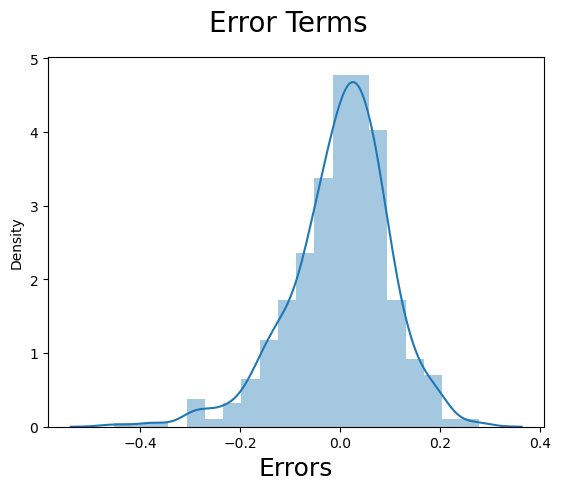

In [68]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)
# Give the X-label
plt.xlabel('Errors', fontsize = 18)

#### Error team is normally distributed for train data

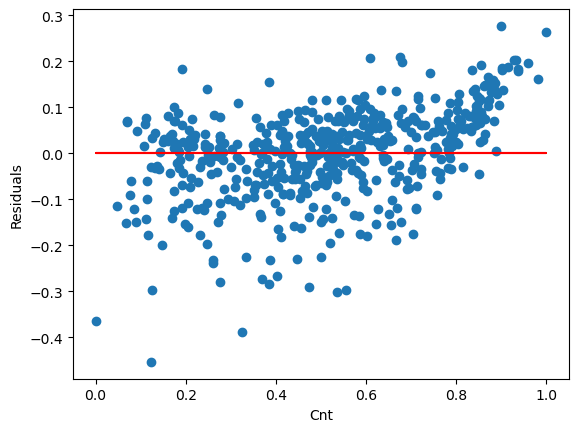

In [69]:
residual = y_train - y_train_pred
fig = plt.figure()
plt.scatter(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Cnt') # Target Variable
plt.ylabel('Residuals')
plt.show()

#### Error terms are independent on one another. No pattrens found for train data

Text(0, 0.5, 'y_train_pred')

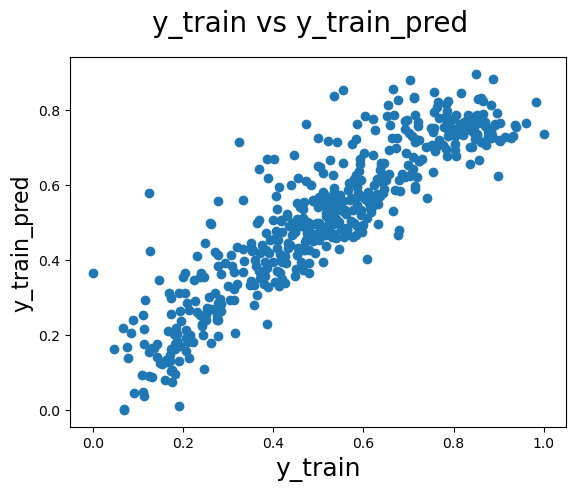

In [70]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_pred', fontsize = 16)

#### As per the plot the spread looks good and there is no skewing observed for train data.

#### R2 Score for Train data

In [71]:
r2 = r2_score(y_true=y_train,y_pred=y_train_pred)
r2 

0.8038032148021996

In [72]:
num_var

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

#### Step 5: Prediction & Model Evaluation on the test on Final Model

Scaling numerical features in `test data` using `transform()` with the inferences made while `fit-tranform()` on `train data`

In [73]:
bike_df_test[num_var] = scaler.transform(bike_df_test[num_var])
bike_df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [74]:
#prepare X_test, and y_test varaibles for prediction
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test

In [75]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [76]:
col2=X.columns
col2

Index(['yr', 'holiday', 'temp', 'windspeed', 'Summer', 'Winter', 'Sep',
       'Light_Snow'],
      dtype='object')

In [77]:
X_test_rfe2 = X_test[col2]

In [78]:
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       220 non-null    float64
 1   yr          220 non-null    int64  
 2   holiday     220 non-null    int64  
 3   temp        220 non-null    float64
 4   windspeed   220 non-null    float64
 5   Summer      220 non-null    int32  
 6   Winter      220 non-null    int32  
 7   Sep         220 non-null    int32  
 8   Light_Snow  220 non-null    int32  
dtypes: float64(3), int32(4), int64(2)
memory usage: 13.8 KB


#### Predictions on Test data

In [79]:
# Making predictions
y_test_pred = lm_model2.predict(X_test_rfe2)

### Checking whether error terms are normally distributed

Text(0.5, 0, 'Errors')

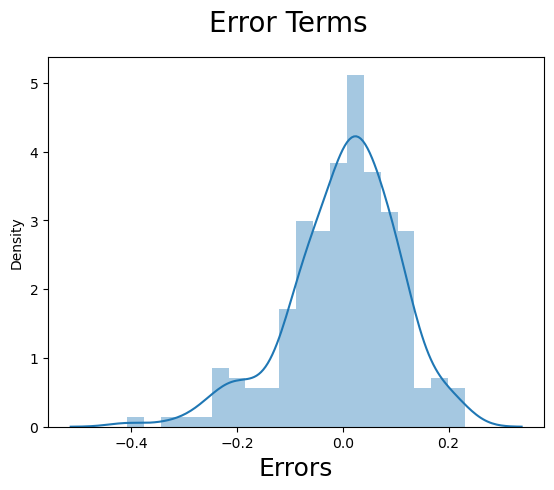

In [80]:
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)
# Give the X-label
plt.xlabel('Errors', fontsize = 18)

Error is difference between actual Y value and predicted Y <br>
Error terms are normally distributed with mean zero

### Checking whether residual are independent of each other 

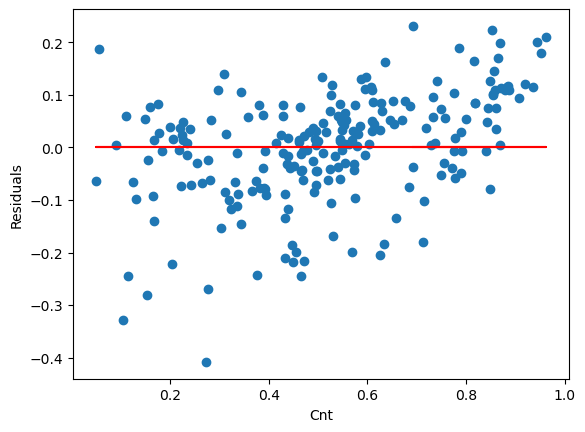

In [81]:
residual = y_test - y_test_pred
fig = plt.figure()
plt.scatter(y_test,residual)
plt.plot(y_test,(y_test - y_test), '-r')
plt.xlabel('Cnt') # Target Variable
plt.ylabel('Residuals')
plt.show()

The error terms are independent on one another. No pattrens found.

### Checking for Error terms have constant variance (homoscedasticity)

Text(0, 0.5, 'y_test_pred')

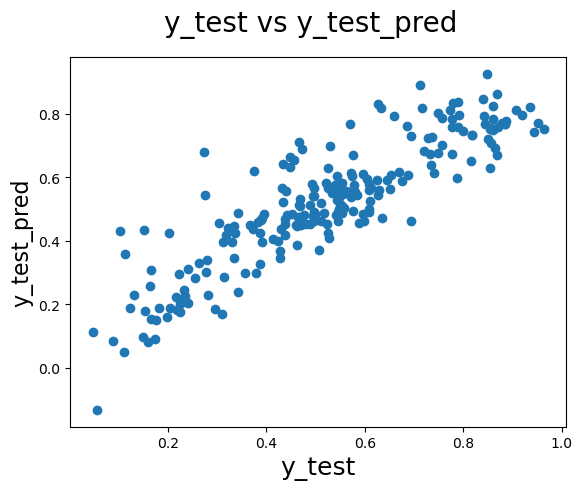

In [82]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

As per the plot the spread looks good and there is no skewing observed.

### Linear Regression Equation:

`cnt` = 0.0875 + (`yr` * 0.2334) + (`holiday` * -0.0867) + (`temp` * 0.5682) + (`windspeed` * -0.1455) + (`Summer` * 0.0812) +(`Winter` * 0.1261+ (`Sep` * 0.0895) + (`Light_Snow` * -0.2535)

#### R2 Score for Test data

In [83]:
r2 = r2_score(y_true=y_test,y_pred=y_test_pred)
r2 

0.7720731949554799

In [84]:
#Calculate Adusted R-Squared for test set:
adjusted_r2 = round(1-(1-r2)*(X_test_rfe2.shape[0]-1)/(X_test_rfe2.shape[0]-X_test_rfe2.shape[1]-1),4)
print(adjusted_r2)

0.7623


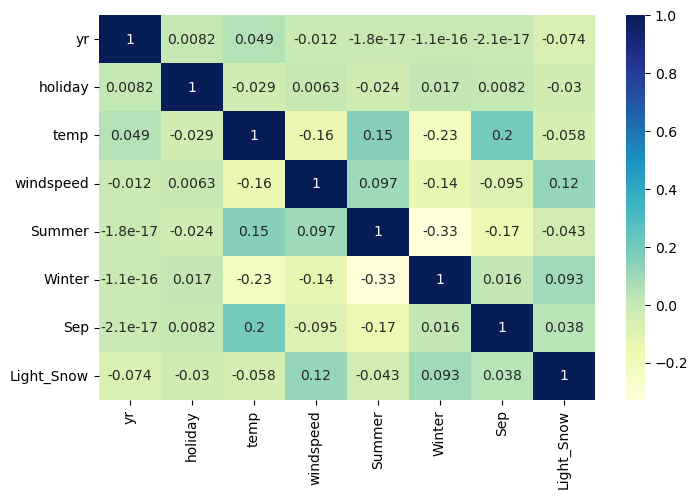

In [85]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(bike_df[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

The final predictors seem to have low correlations which has 8 features :<br>
`yr`, `Holiday`, `temp`, `windspeed`, `Summer`, `Winter`, `Sep`, `Light_snow`

- **Top Variables (5 Variables) Significant in Predicting the Model**
  - **temp**: Temperature variable has highest coefficient value of `0.5682`. Which indicates a unit of increase in temperature increase the demand by 0.5682 units.
  - **Light_Snow**: (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) : This has a coefficient value of `-0.2535` indicats that, a unit increase in Light_Snow variable decreases the demand  by 0.2535 units.
  - **yr**: The coefficiant of yr (year) is `0.2334`. Which indicates a increase of unit in year (2018 to 2019) increase the demand for bikes by 0.2334
  - **windspeed**: The coefficient of windspeed is `-0.1455`.Which incidates an increase of windspeed decreases the demand by 0.1455
  - **Winter**: The coefficient of winter is 0.1261. This indicates the winter season increase the demand for the bikes by 0.1261
  
  
  `cnt` = 0.0875 + (`yr` * 0.2334) + (`holiday` * -0.0867) + (`temp` * 0.5682) + (`windspeed` * -0.1455) + (`Summer` * 0.0812) +(`Winter` * 0.1261+ (`Sep` * 0.0895) + (`Light_Snow` * -0.2535)

#### Comparision Of Training and Testing Data:
  - Train Dataset `R-Square`d: `0.804`
  - Test Dataset  `R-Squared`: `0.7720`
  - Train DataSet `Adjusted-R-Squared`:`0.801`
  - Test Dataset `Adjusted-R-Squared` :`0.7623`

As per above, the model is comparable in this case and explains about approx 80% of the varaince